In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/veetheviking/Desktop/Heart_Attack_Classification_2.csv")

In [3]:
df.head(7)

,Age,Sex,Chest pain,Blood pressure,Cholestoral,Diabetes,Max heart rate,Exercice induced angina,Number of vessels,Other observations,Risk of heart attack
0,59,Female,Asymptomatic,140,177,No,162,Yes,1,Reversible vessel defect,No
1,60,Female,Asymptomatic,125,258,No,141,Yes,1,Reversible vessel defect,No
2,64,Female,Asymptomatic,128,263,No,105,Yes,1,Reversible vessel defect,Yes
3,76,Male,Non-atypical angina,140,197,No,116,No,0,Normal blood flow,Yes
4,65,Male,Asymptomatic,150,225,No,114,No,3,Reversible vessel defect,No
5,60,Male,Typical angina,150,240,No,171,No,0,Normal blood flow,Yes
6,43,Female,Non-atypical angina,130,315,No,162,No,1,Normal blood flow,Yes


In [4]:
df.info

<bound method DataFrame.info of      Age     Sex           Chest pain  Blood pressure  Cholestoral Diabetes  \
0     59  Female         Asymptomatic             140          177       No   
1     60  Female         Asymptomatic             125          258       No   
2     64  Female         Asymptomatic             128          263       No   
3     76    Male  Non-atypical angina             140          197       No   
4     65    Male         Asymptomatic             150          225       No   
..   ...     ...                  ...             ...          ...      ...   
295   56  Female       Typical angina             120          193       No   
296   51  Female         Asymptomatic             140          298       No   
297   55  Female         Asymptomatic             140          217       No   
298   54  Female         Asymptomatic             122          286       No   
299   58  Female         Asymptomatic             114          318       No   

     Max heart rate

In [5]:
df.describe()

,Age,Blood pressure,Cholestoral,Max heart rate,Number of vessels
count,300.000000,300.000000,300.00000,300.000000,300.000000
mean,54.363333,131.560000,246.34000,149.560000,0.730000
std,9.111241,17.448627,51.96073,22.970384,1.023356
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,47.750000,120.000000,211.00000,133.000000,0.000000
50%,55.000000,130.000000,240.50000,152.500000,0.000000
75%,61.000000,140.000000,274.25000,166.000000,1.000000
max,77.000000,200.000000,564.00000,202.000000,4.000000


In [6]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain                 0
Blood pressure             0
Cholestoral                0
Diabetes                   0
Max heart rate             0
Exercice induced angina    0
Number of vessels          0
Other observations         0
Risk of heart attack       0
dtype: int64

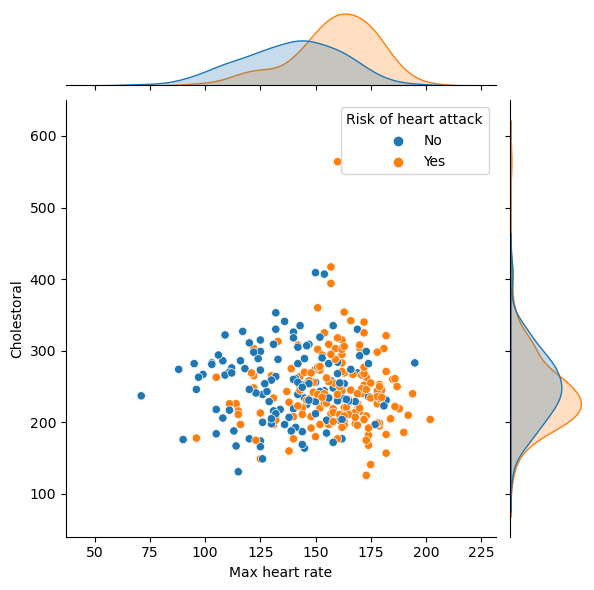

In [7]:
sns.jointplot(x=df['Max heart rate'], y=df['Cholestoral'], alpha=1.0, hue=df['Risk of heart attack']);

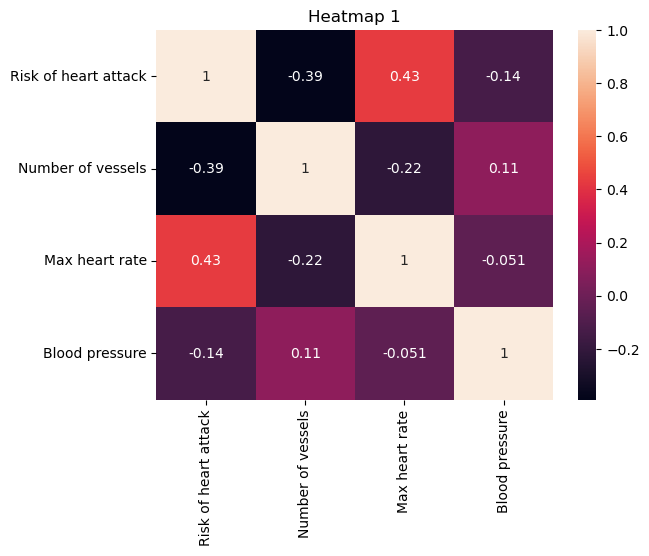

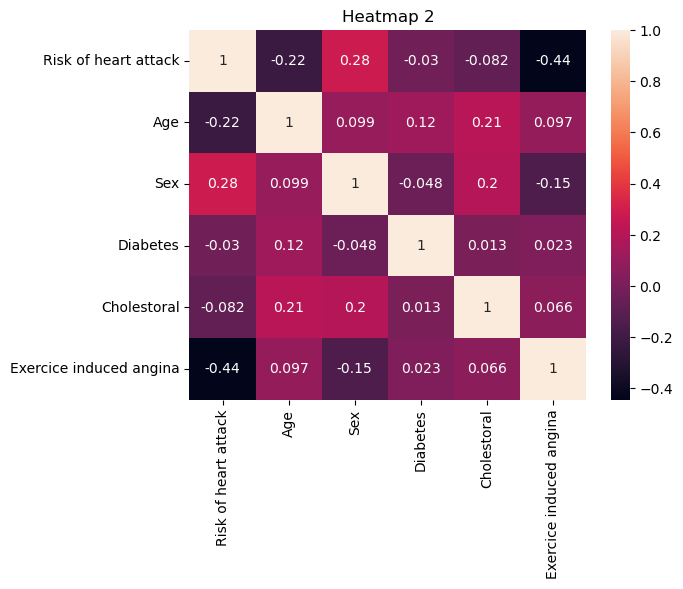

In [8]:
df.replace({"Sex":{'Male':1,'Female':0}},inplace=True)
df.replace({"Risk of heart attack":{'Yes':1,'No':0}},inplace=True)
df.replace({"Diabetes":{'Yes':1,'No':0}},inplace=True)
df.replace({"Exercice induced angina":{'Yes':1,'No':0}},inplace=True)
columns_heatmap1 = ['Risk of heart attack', 'Number of vessels','Max heart rate','Blood pressure']
columns_heatmap2 = ['Risk of heart attack', 'Age', 'Sex', 'Diabetes', 'Cholestoral', 'Exercice induced angina']  # Include 'Risk of heart attack' in the second heatmap

heatmap_data1 = df[columns_heatmap1]
heatmap_data2 = df[columns_heatmap2]


corr1 = heatmap_data1.corr()
corr2 = heatmap_data2.corr()

sns.heatmap(corr1, annot = True)
plt.title('Heatmap 1')
plt.show()
sns.heatmap(corr2, annot = True)
plt.title('Heatmap 2')
plt.show()

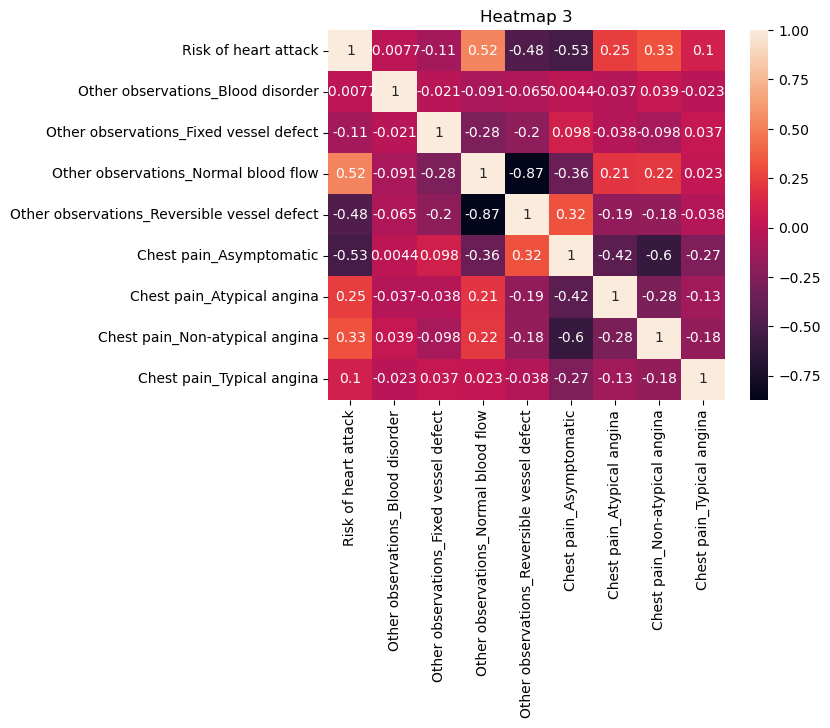

In [9]:
df_encoded = df.copy()

df_encoded = df_encoded.drop(columns = ['Other observations', 'Chest pain'],axis =1)

categorical_columns = ['Other observations', 'Chest pain']
categorical_data = df[categorical_columns]
categorical_data_encoded = pd.get_dummies(categorical_data)
df_encoded = pd.concat([df_encoded, categorical_data_encoded],axis=1)
columns_heatmap3 = [ 'Risk of heart attack', 'Other observations_Blood disorder',
       'Other observations_Fixed vessel defect',
       'Other observations_Normal blood flow',
       'Other observations_Reversible vessel defect',
       'Chest pain_Asymptomatic', 'Chest pain_Atypical angina',
       'Chest pain_Non-atypical angina', 'Chest pain_Typical angina']
heatmap_data3 = df_encoded[columns_heatmap3]

corr3 = heatmap_data3.corr()

sns.heatmap(corr3, annot = True)
plt.title('Heatmap 3')
plt.show()

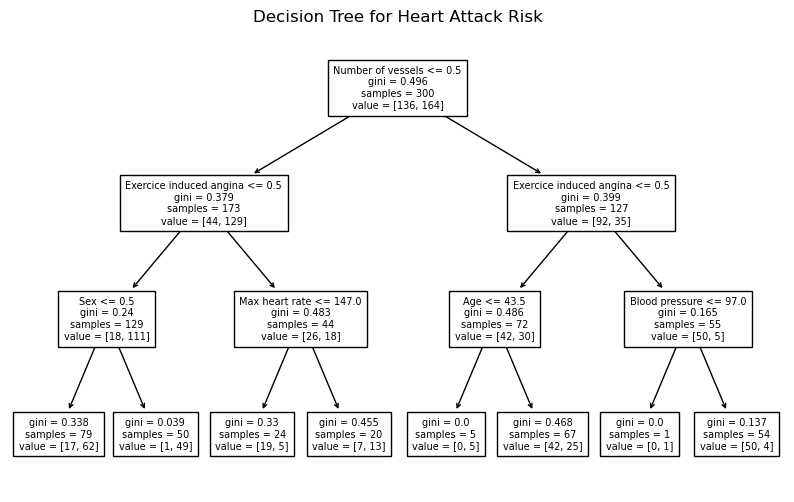

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


decision_tree = tree_clf.fit(df[['Age', 'Sex', 'Blood pressure', 'Cholestoral', 'Diabetes',
       'Max heart rate', 'Exercice induced angina', 'Number of vessels']], df['Risk of heart attack'])
plt.figure(figsize=(10,6))
tree.plot_tree(decision_tree, feature_names=['Age', 'Sex', 'Blood pressure', 'Cholestoral', 'Diabetes',
       'Max heart rate', 'Exercice induced angina', 'Number of vessels'],fontsize=7)


plt.title("Decision Tree for Heart Attack Risk")
plt.show()

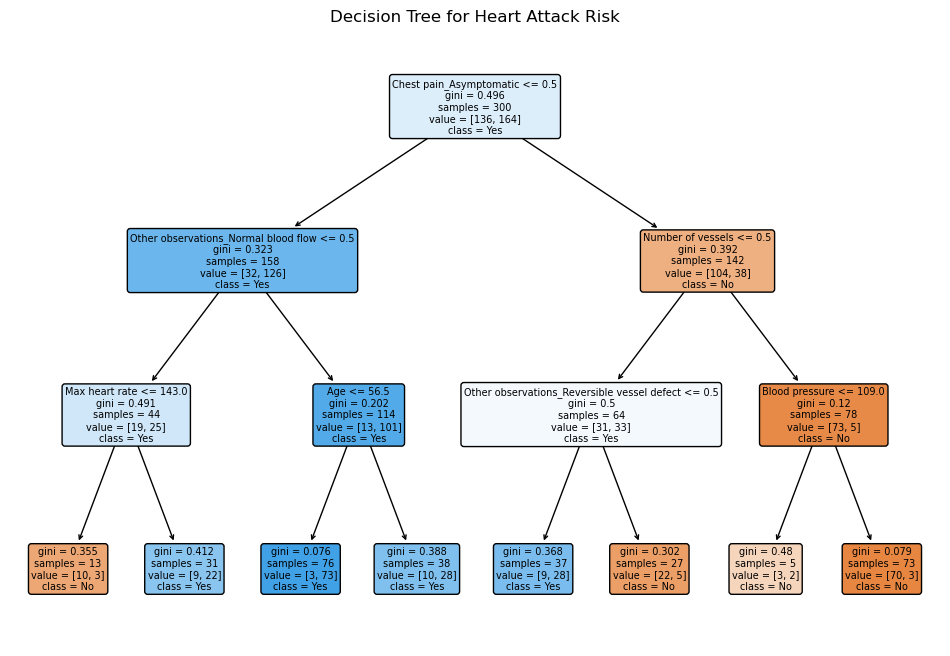

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

feature_names = list(df_encoded.columns)
feature_names.remove('Risk of heart attack') 

X = df_encoded.drop("Risk of heart attack", axis=1)
y = df_encoded["Risk of heart attack"]

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=feature_names, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=7)
plt.title("Decision Tree for Heart Attack Risk")
plt.show()

In [12]:
X_original = df.drop(columns='Risk of heart attack')
y=df['Risk of heart attack']

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def prepare_data(X):
    numeric_columns = X.select_dtypes(exclude='object').columns
    categorical_columns = X.select_dtypes(include='object').columns

    numeric_features = Pipeline([
        ('handlingmissingvalues', SimpleImputer(strategy='median')),
        ('scaling', StandardScaler(with_mean=True))
    ])

    categorical_features = Pipeline([
        ('handlingmissingvalues', SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder()),
        ('scaling', StandardScaler(with_mean=False))
    ])

    processing = ColumnTransformer([
        ('numeric', numeric_features, numeric_columns),
        ('categorical', categorical_features, categorical_columns)
    ])
    
    X_processed = processing.fit_transform(X)
    
    return X_processed

X_processed = prepare_data(X_original)
X_processed

array([[ 0.50974549, -0.68599434,  0.48451388, ...,  0.        ,
         0.        ,  2.05677351],
       [ 0.61968341, -0.68599434, -0.37658899, ...,  0.        ,
         0.        ,  2.05677351],
       [ 1.0594351 , -0.68599434, -0.20436841, ...,  0.        ,
         0.        ,  2.05677351],
       ...,
       [ 0.06999381, -0.68599434,  0.48451388, ...,  0.        ,
         0.        ,  2.05677351],
       [-0.03994411, -0.68599434, -0.54880956, ...,  0.        ,
         2.01007563,  0.        ],
       [ 0.39980757, -0.68599434, -1.00806442, ...,  4.21075961,
         0.        ,  0.        ]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape',y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape',y_test.shape)

Train X dataset shape: (240, 16)
Train y dataset shape (240,)
Test X dataset shape: (60, 16)
Test y dataset shape (60,)


In [15]:
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(model):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    ax.set_title('Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

In [16]:
from sklearn.metrics import classification_report
def print_classification_report(model):
    print('Classification report:')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [17]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
def print_roc_curve(model):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

First Logistic regression 

Default Hyperparameters:
C: 1.0
Penalty: l2
Solver: lbfgs


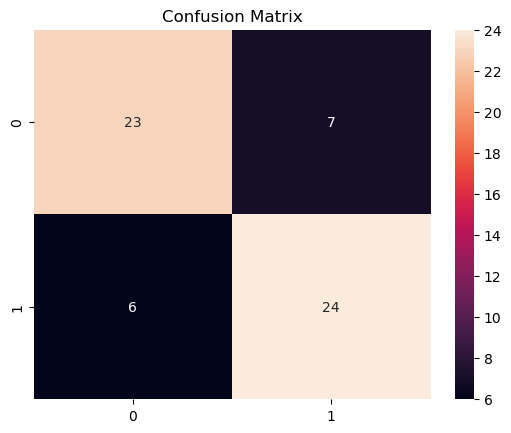

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



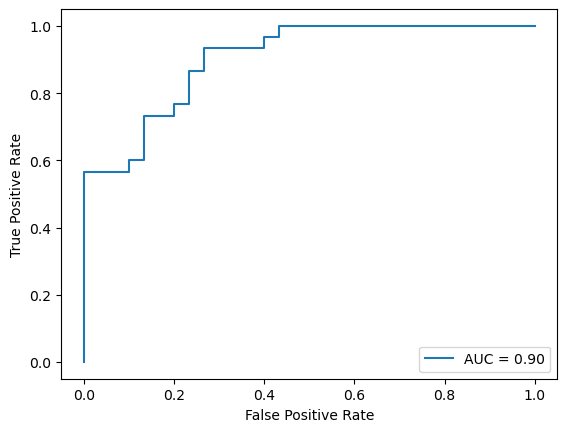

In [18]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 1000, random_state=42)
lr_clf.fit(X_train, y_train)
hyperparameters = lr_clf.get_params()

print('First Logistic regression \n')
print("Default Hyperparameters:")
print(f"C: {lr_clf.C}")
print(f"Penalty: {lr_clf.penalty}")
print(f"Solver: {lr_clf.solver}")

print_confusion_matrix(lr_clf)
print_classification_report(lr_clf)
print_roc_curve(lr_clf)

Second Logistic Regression 

Best Hyperparameters:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


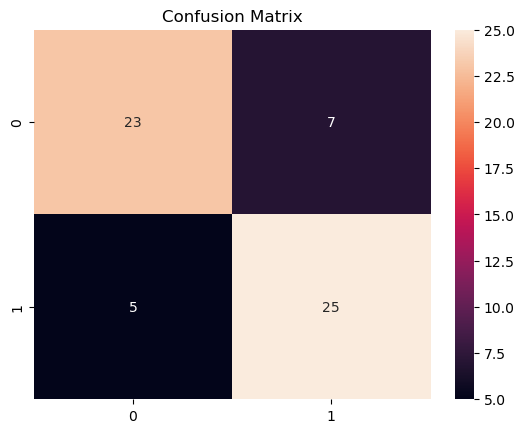

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.83      0.81        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



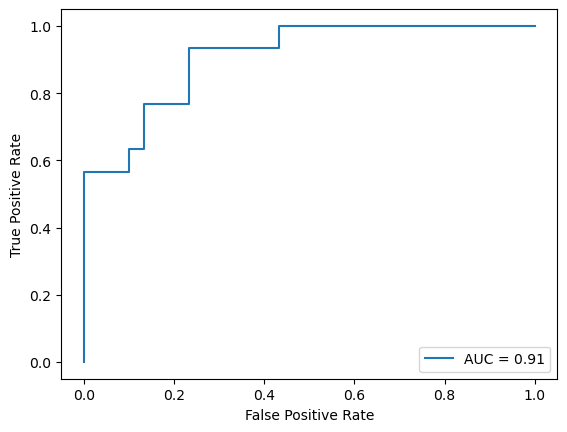

In [19]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'],  
}


lr = LogisticRegression(random_state=42)


grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_lr = grid_search.best_estimator_

print('Second Logistic Regression \n')
print("Best Hyperparameters:")
print(grid_search.best_params_)


best_lr.fit(X_train, y_train)

print_confusion_matrix(best_lr)
print_classification_report(best_lr)
print_roc_curve(best_lr)

/Users/veetheviking/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Third Logistic regression - Interactions
Third Model Hyperparameters:
C: 1.0
Penalty: l2
Solver: lbfgs


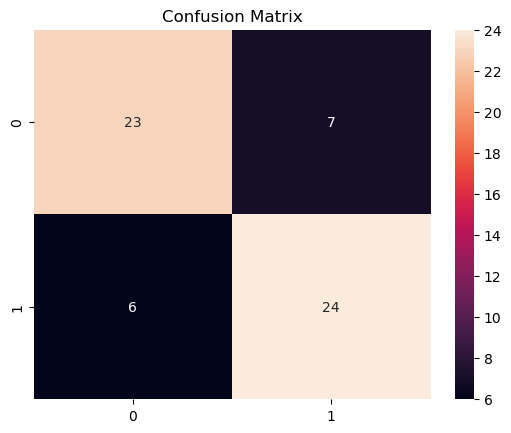

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



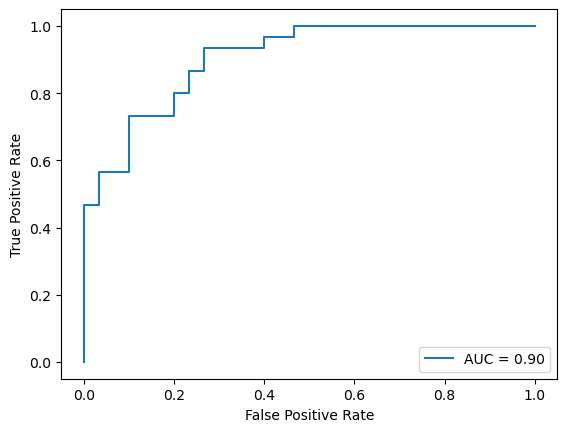

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline



# Create a logistic regression model with interactions
lr2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('logistic', LogisticRegression(max_iter = 100, random_state=42))
])

lr2.fit(X_train, y_train)

hyperparameters = lr2.named_steps['logistic'].get_params()
print('Third Logistic regression - Interactions')

print("Third Model Hyperparameters:")
print(f"C: {hyperparameters['C']}")
print(f"Penalty: {hyperparameters['penalty']}")
print(f"Solver: {hyperparameters['solver']}")

print_confusion_matrix(lr2)
print_classification_report(lr2)
print_roc_curve(lr2)

SVM classifier


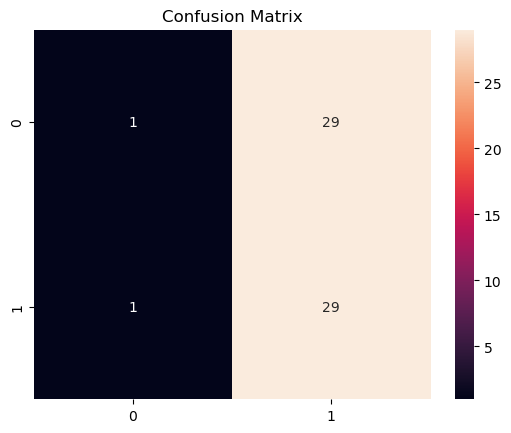

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.50      0.97      0.66        30

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.36        60
weighted avg       0.50      0.50      0.36        60



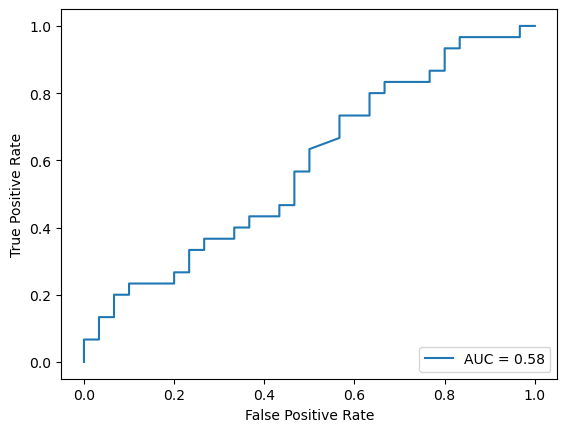

In [21]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42, probability=True)
svm_clf.fit(X_train, y_train)
print('SVM classifier')
print_confusion_matrix(svm_clf)
print_classification_report(svm_clf)
print_roc_curve(svm_clf)


AUC: 0.9099999999999999
Improved SVM Classifier


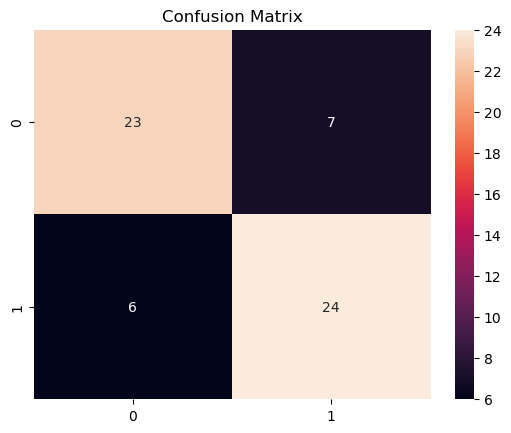

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



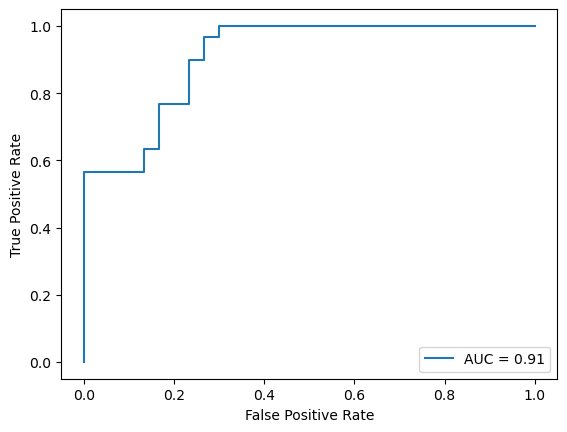

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

svm_clf2 = SVC(C=1, gamma='scale', kernel='linear', random_state=42, probability=True)
svm_clf2.fit(X_train, y_train)

y_pred = svm_clf2.predict(X_test)
y_prob = svm_clf2.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

print("Improved SVM Classifier")
print_confusion_matrix(svm_clf2)
print_classification_report(svm_clf2)
print_roc_curve(svm_clf2)


AUC: 0.9133333333333333
Adjusted SVM Classifier


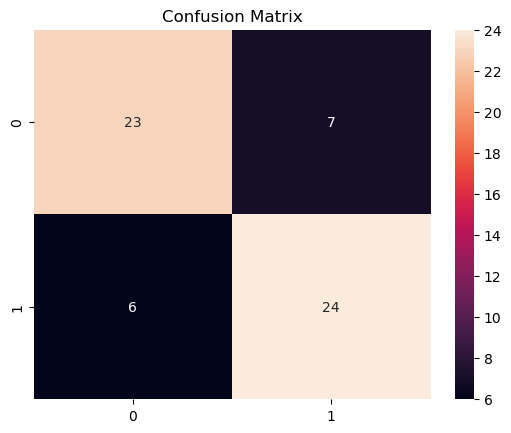

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



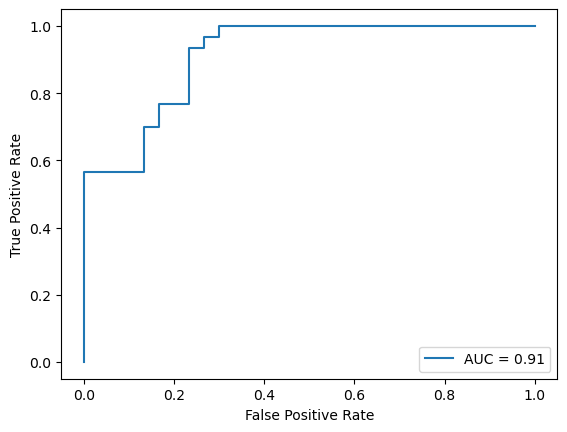

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

svm_clf2 = SVC(C=10, gamma='scale', kernel='linear', random_state=42, probability=True)
svm_clf2.fit(X_train, y_train)

y_pred = svm_clf2.predict(X_test)
y_prob = svm_clf2.predict_proba(X_test)[:, 1]

# Step 3: Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print AUC
print("AUC:", roc_auc)

print("Adjusted SVM Classifier")
print_confusion_matrix(svm_clf2)
print_classification_report(svm_clf2)
print_roc_curve(svm_clf2)

Random forest classifier


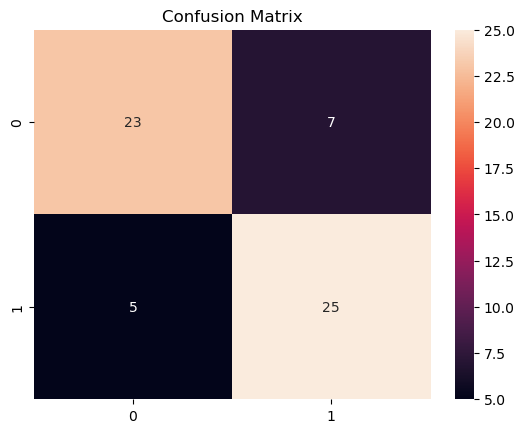

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.83      0.81        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



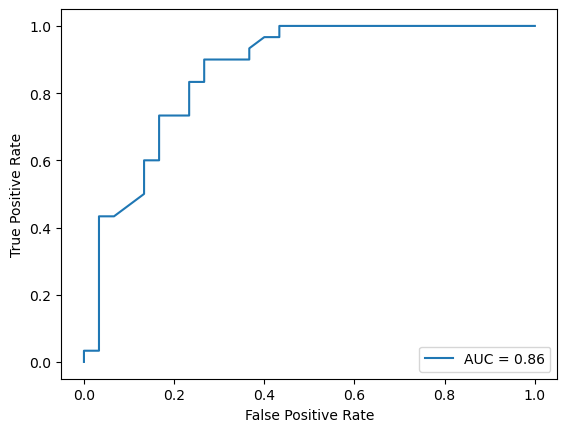

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print('Random forest classifier')
print_confusion_matrix(rf_clf)
print_classification_report(rf_clf)
print_roc_curve(rf_clf)


KNN classifier


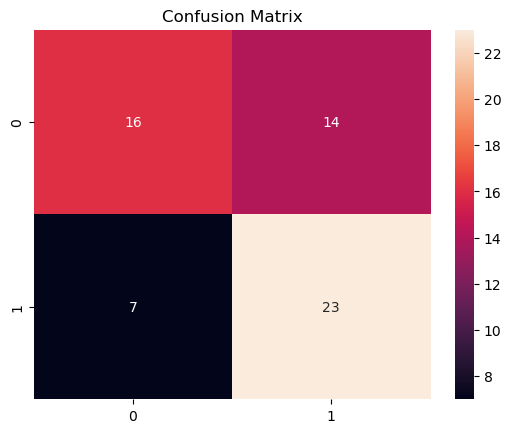

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.53      0.60        30
           1       0.62      0.77      0.69        30

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



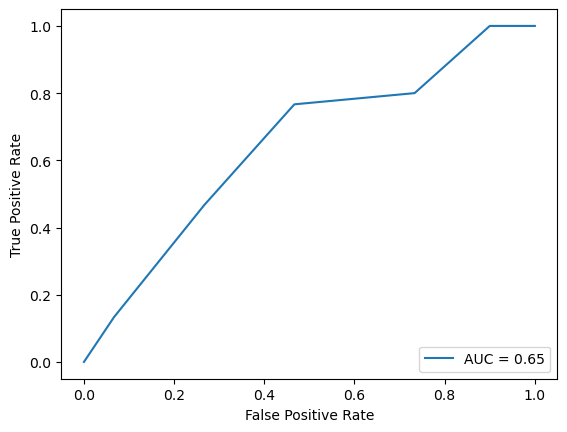

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN classifier')
print_confusion_matrix(knn_clf)
print_classification_report(knn_clf)
print_roc_curve(knn_clf)


AdaBoost classifier


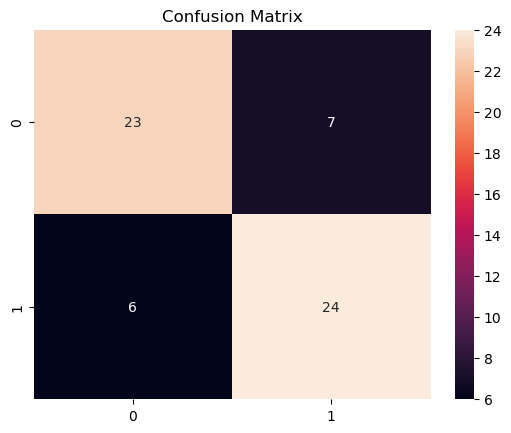

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



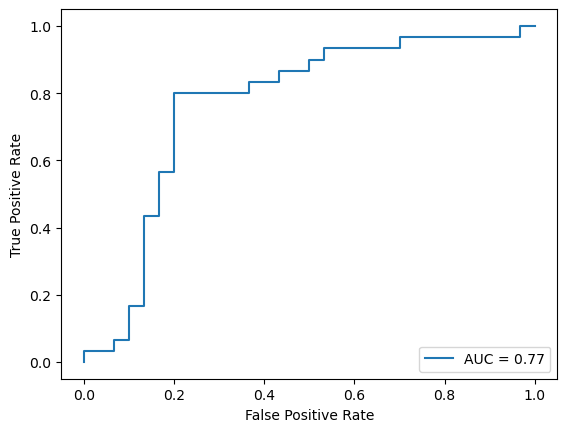

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)
print('AdaBoost classifier')
print_confusion_matrix(ada_clf)
print_classification_report(ada_clf)
print_roc_curve(ada_clf)


Gradient boost classifier


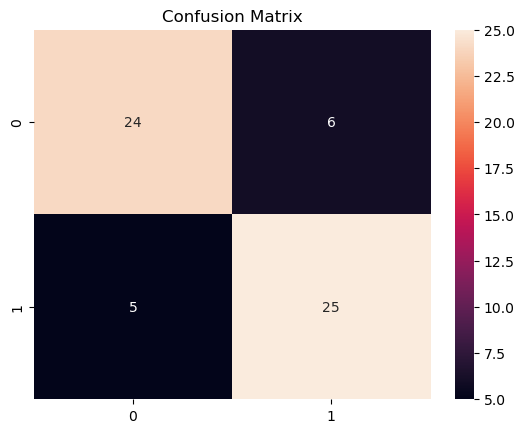

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.83      0.82        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



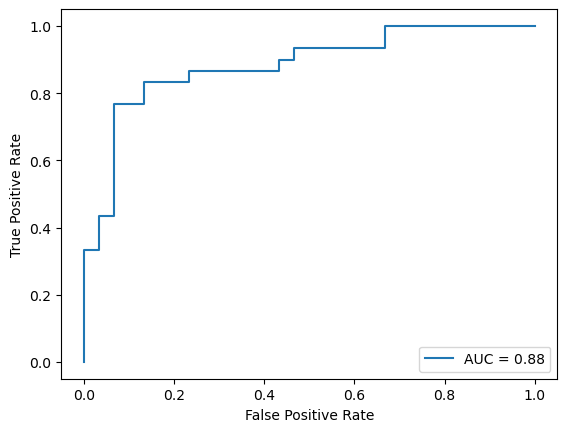

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
print('Gradient boost classifier')
print_confusion_matrix(gb_clf)
print_classification_report(gb_clf)
print_roc_curve(gb_clf)

Soft Voting classifier


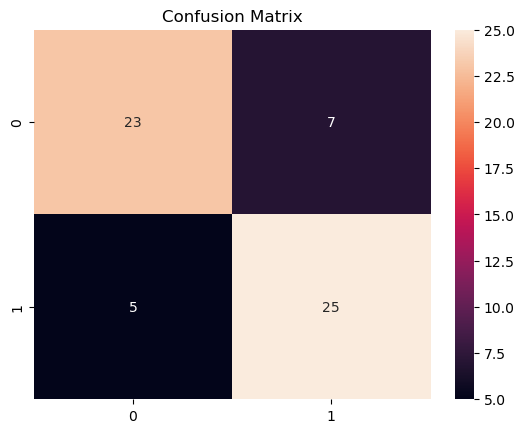

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.83      0.81        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



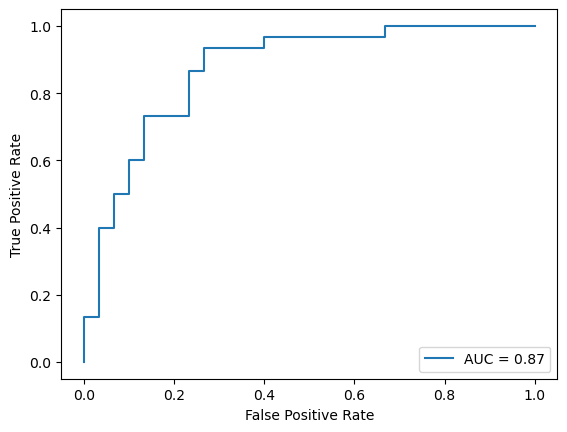

In [29]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('rf', rf_clf), ('svm', svm_clf2), ('knn', knn_clf), ('ada', ada_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
print('Soft Voting classifier')
print_confusion_matrix(voting_clf)
print_classification_report(voting_clf)
print_roc_curve(voting_clf)


Hard Voting classifier


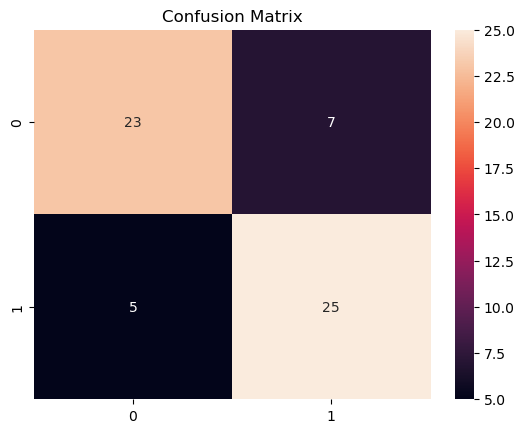

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.83      0.81        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [33]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('rf', rf_clf), ('svm', svm_clf2), ('knn', knn_clf), ('ada', ada_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
print('Hard Voting classifier')

print_confusion_matrix(voting_clf)
print_classification_report(voting_clf)
